In [1]:
import warnings
from typing import Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("Consumption of meat per capita.csv")
print("data.shape = {} rows, {} cols".format(*data.shape))
data['Diet_Type'] = data[['Beef','Poultry']].idxmax(axis=1)
data = data.groupby('Diet_Type').apply(lambda x: x.sample(200)).reset_index(drop=True)
data
X = data[['Beef','Poultry']]
Y = data['Diet_Type']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=50)

el=LabelEncoder()
Y_train_encoder = el.fit_transform(Y_train)
Y_test_encoder = el.fit_transform(Y_test)

model = DecisionTreeClassifier()
model.fit(X_train,Y_train_encoder)


data.shape = 10080 rows, 8 cols


C:\Users\Robot\AppData\Local\Temp\ipykernel_6000\2264544478.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('Diet_Type').apply(lambda x: x.sample(200)).reset_index(drop=True)


DecisionTreeClassifier()

In [5]:
x_min,x_max = X.iloc[:,0].min() - 5, X.iloc[:,0].max() + 5
y_min, y_max = X.iloc[:,1].min() - 5, X.iloc[:,1].max() +5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

C:\Users\Robot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [6]:
Y_train

145       Beef
387    Poultry
44        Beef
138       Beef
43        Beef
        ...   
132       Beef
289    Poultry
109       Beef
395    Poultry
176       Beef
Name: Diet_Type, Length: 320, dtype: object

In [7]:
Y_train_encoder

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,

In [8]:
print(X.columns)

Index(['Beef', 'Poultry'], dtype='object')


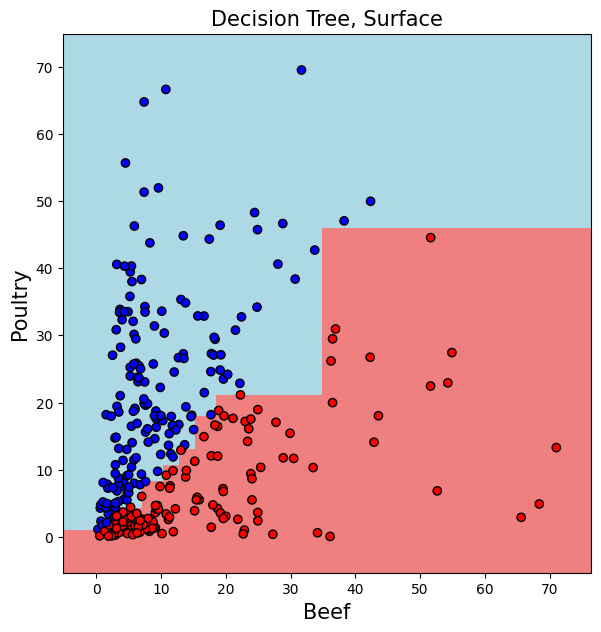

In [9]:
plt.figure(figsize=(15, 7))
plt.subplot(121)
plt.title("Decision Tree, Surface", size=15)


cmap_light = ListedColormap(['lightcoral', 'lightblue'])  # Два чётких цвета

plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
cmap_points = ListedColormap(['red','blue' ])
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=Y_train_encoder, edgecolors='k', cmap=cmap_points)
plt.xlabel("Beef", size=15)
plt.ylabel("Poultry", size=15)
plt.show()

[Text(0.44642857142857145, 0.9444444444444444, 'Poultry <= 4.275\ngini = 0.498\nsamples = 320\nvalue = [150, 170]\nclass = Poultry'),
 Text(0.17857142857142858, 0.8333333333333334, 'Beef <= 1.856\ngini = 0.175\nsamples = 103\nvalue = [93, 10]\nclass = Beef'),
 Text(0.3125, 0.8888888888888888, 'True  '),
 Text(0.07142857142857142, 0.7222222222222222, 'Poultry <= 1.07\ngini = 0.49\nsamples = 14\nvalue = [6, 8]\nclass = Poultry'),
 Text(0.03571428571428571, 0.6111111111111112, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Beef'),
 Text(0.10714285714285714, 0.6111111111111112, 'Beef <= 1.39\ngini = 0.198\nsamples = 9\nvalue = [1, 8]\nclass = Poultry'),
 Text(0.07142857142857142, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = Poultry'),
 Text(0.14285714285714285, 0.5, 'Poultry <= 1.761\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = Poultry'),
 Text(0.10714285714285714, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Beef'),
 Text(0.17857142857142858, 0

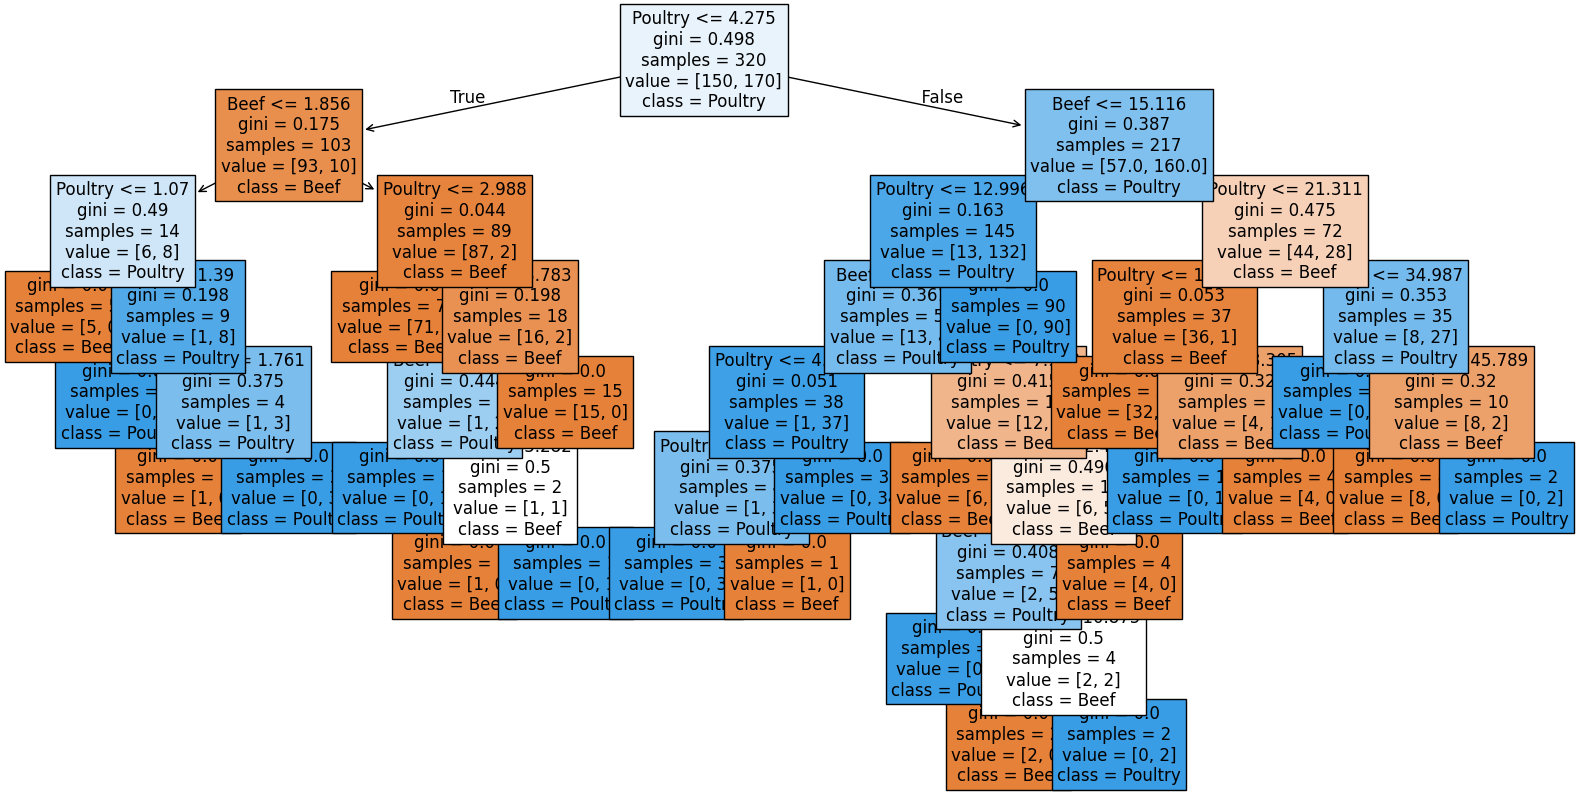

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(model,feature_names=['Beef',"Poultry"],class_names=['Beef',"Poultry"],filled=True,fontsize=12)